# GRIP - THE SPARKS FOUNDATION


### By - Sunanda Mahanta

## TASK 1 - Prediction using Supervised ML

1. Predict the percentage of an student based on the number of study hours using Simple Linear Regression model.
2. Also predict the percentage of the student if he/she studies 9.25 hrs/day.

### Step 1 - Import all libraries

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

### Step 2 : Reading and Understanding Data

In [2]:
#Imporing data from url and check head of data
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Number of rows and columns in the data
data.shape

(25, 2)

In [4]:
#data type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Summary of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Check for Null values in the data

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no missing values in the data.

### Step 3 : Exploratory Data Analysis

#### 1. Univariate Analysis

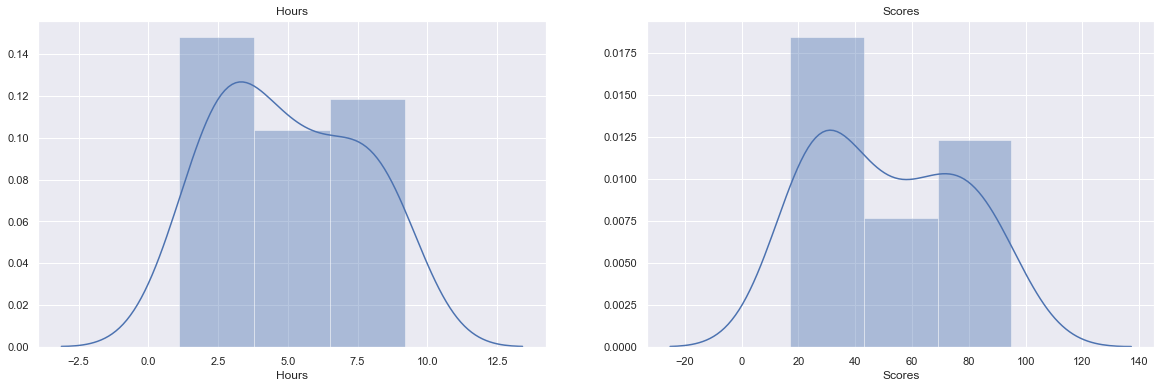

In [7]:
plt.figure(figsize=(20,6))
features = ['Hours','Scores']
for i in enumerate(features):
    plt.subplot(1,2,i[0]+1)
    sns.distplot(data[i[1]])
    plt.title(i[1])
plt.show()    

###### Insight : 
The student generally spends 2 to 4 hrs/day in study and scores in between 20-40.

#### Outlier Analysis

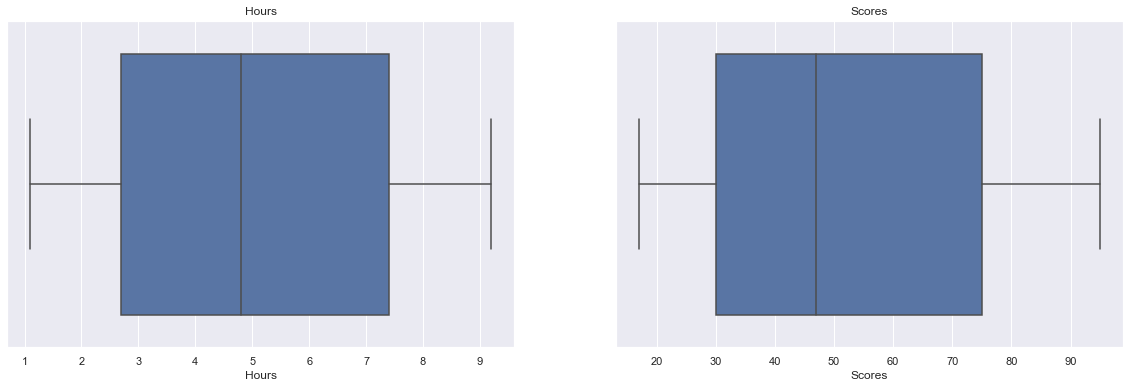

In [8]:
plt.figure(figsize=(20,6))
features = ['Hours','Scores']
for i in enumerate(features):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.title(i[1])
plt.show()    

##### Insight :
There is no outlier in the data.

#### 2. Bivariate Analysis

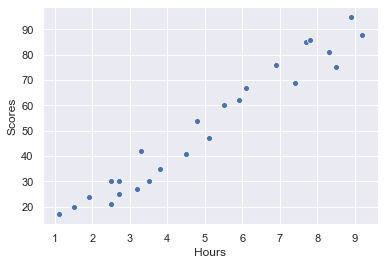

In [9]:
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.show()

##### Insight :
It can be seen from the above graph that study hours per day and score secured in exam are linearly dependent. If you study more, you will get more score.

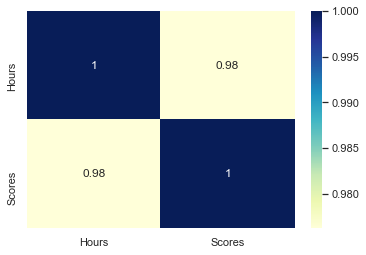

In [10]:

sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Insight :
Houres is highly correlated to Scores.

### Step 4 : Splitting data into train and test data sets

Below, the data is splitted; 70% of the data for training and 30% for testing.

In [11]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Dividing into X and Y sets for the model building

In [12]:
y_train = data.Scores
X_train = data.Hours

### Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [13]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    2.483673
Hours    9.775803
dtype: float64

In [14]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           9.13e-17
Time:                        14:55:41   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

##### Insight :
Here we get very good result.p value of 'Hours' is 0 and r-squared and adjusted r-squared value of the model obtained from train data are 0.953 and 0.951 respectively.  R-squared is a statistical measure of how close the data are to the fitted regression line.

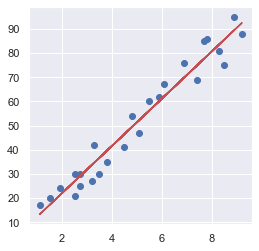

In [15]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[4,4])
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 2.4837 + 9.7758*X_train_lm.iloc[:, 1], 'r')
plt.show()

### Step 6 : Making Predictions

In [16]:
# Making predictions on y_train using the model
y_train_pred = lr.predict(X_train_lm)
y_train_pred.head()

0    26.923182
1    52.340271
2    33.766244
3    85.578002
4    36.698985
dtype: float64

In [17]:
data_train = pd.DataFrame({'Actual':y_train,'Predicted':y_train_pred})
data_train.head()

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985


In [18]:
#Prediction on test data
X_test = df_test['Hours']
y_test = df_test['Scores']

In [19]:
y_test.shape

(8,)

In [20]:
# Adding constant variable to test dataframe
X_test_ml = sm.add_constant(X_test)

# Making predictions using the model
y_pred_ml = lr.predict(X_test_ml)
y_pred_ml

9     28.878343
22    39.631726
13    34.743825
11    60.160913
5     17.147378
19    74.824618
23    69.936717
21    49.407530
dtype: float64

In [21]:
data_test = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ml})
data_test

,Actual,Predicted
9,25,28.878343
22,35,39.631726
13,42,34.743825
11,62,60.160913
5,20,17.147378
19,69,74.824618
23,76,69.936717
21,54,49.407530


#### Visualization of Linear Regression Model on Test data

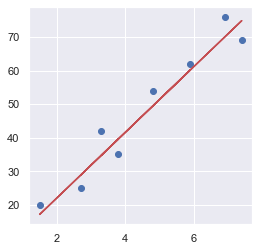

In [22]:
plt.figure(figsize=[4,4])
plt.scatter(X_test_ml.iloc[:, 1], y_test)
plt.plot(X_test_ml.iloc[:, 1], 2.4837 + 9.7758*X_test_ml.iloc[:, 1], 'r')
plt.show()

### Step 6 : Model Evaluation on Test Data

In [23]:
#R-squared value
test_r2 = round(r2_score(y_true=y_test, y_pred=y_pred_ml),2)
print('R2 Score of Test Datasets is:',test_r2)


R2 Score of Test Datasets is: 0.94


In [24]:
#Adjusted R-squared value
n = df_test.shape[0] #no of rows
p = df_test.shape[1]  #no of columns/featutres
test_adj_r2 = round((1-(1-test_r2)*(n-1)/(n-p-1)),2)

print('Adjusted R2 Score of Test Datasets is:',test_adj_r2)

Adjusted R2 Score of Test Datasets is: 0.92


In [25]:
#Model evaluation using RMSE & RMAE values
MSE = round(mean_squared_error(y_test,y_pred_ml),2)
MAE = round(mean_absolute_error(y_test,y_pred_ml),2)
print("Mean Squared Error of Test Data :", MSE)
print("Mean Absolute Error of Test Data :", MAE)
print()
print("Root Mean Squared Error of Test Data :", round(math.sqrt(MSE),2))
print("Root Mean Absolute Error of Test Data :", round(math.sqrt(MAE),2))


Mean Squared Error of Test Data : 24.06
Mean Absolute Error of Test Data : 4.62

Root Mean Squared Error of Test Data : 4.91
Root Mean Absolute Error of Test Data : 2.15


### Predicting the Model with Unknown value

In [26]:
# What will be predicted score if a student studies for 9.25 hrs/ day
time = 9.25
hours = sm.add_constant(pd.DataFrame({'Hours':[time]}),has_constant='add')
score = lr.predict(hours)
print("If a students studies for {0} hours per day, his/her predicted score will be {1}%".format(time,round(score[0],2)))

If a students studies for 9.25 hours per day, his/her predicted score will be 92.91%
